In [3]:

import scipy.io
import pandas as pd
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt 
from scipy.stats import norm
from scipy import interpolate
from math import sqrt, exp


In [1]:
# this piece of code does the same as the Excel sheet. But it's easier to
# change number of simulations here

# Input data
SpotRate = 0.002;
k = 0.1;
theta = 0.02;
Vol = 0.01;
SwapRate = 0.01; # pick your self or calculate at-market rate
TimeSteps = numpy.arange(0, 10.25, 0.25);
T = len(TimeSteps)-1;
PFE = []

NameError: name 'numpy' is not defined

In [ ]:
K = 100

In [2]:
# This part is run many times
InterestRate = np.empty((T,K))
FloatingLeg = np.empty((T,K))
FixedLeg = np.empty((T,K))
SwapMtM = np.empty((T,K))

NameError: name 'np' is not defined

In [7]:
for m in range(K):
    # Simulate interest rates
    InterestRate[0,m] = SpotRate
    for i in range(1,T):
        InterestRate[i,m] = InterestRate[i-1,m] + k*(theta-InterestRate[i-1,m])*(TimeSteps[i]-TimeSteps[i-1])+np.random.standard_normal()*np.sqrt((TimeSteps[i]-TimeSteps[i-1]))*Vol

    B = (1-np.exp(-k*TimeSteps[1:T+1]))/k
    A = np.exp(((B-TimeSteps[1:T+1])*(k**2*theta-Vol**2/2))/k**2-(Vol**2*B**2/(4*k)))

    # Calculate discount factors to value swap
    DiscountFactors = np.full([T, T], np.nan)

    for i in range(T):
        DiscountFactors[:(T-i),i] = A[i]*np.exp(-InterestRate[:(T-i),m]*np.transpose(B[i]))

    FloatingLeg[:,m] = np.ones(T)-np.fliplr(DiscountFactors).diagonal()
    FixedLeg[:,m] = SwapRate*0.25*np.nansum(DiscountFactors, axis = 1)
    SwapMtM[:,m] = (FixedLeg[:,m]-FloatingLeg[:,m])

In [8]:
# Calculate exposure and 90% peak exposure
Exposure = SwapMtM*(SwapMtM>0);
EE = Exposure.mean(axis = 1)

for i in range(T):
    PFE.append(np.quantile(SwapMtM[i,:],0.9))

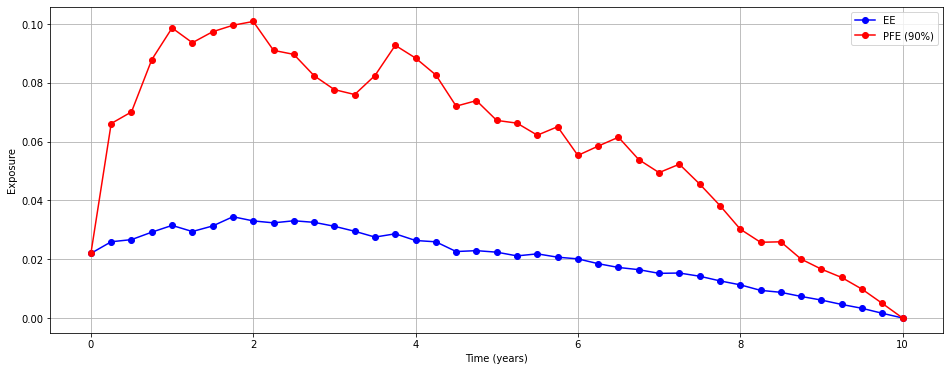

In [10]:
plt.figure(figsize = (16,6))
plt.plot(TimeSteps, np.append(EE, 0), '-bo', label = 'EE')
plt.plot(TimeSteps, np.append(PFE, 0), '-ro', label = 'PFE (90%)')
plt.xlabel('Time (years)')
plt.ylabel('Exposure')
plt.legend()
plt.grid()
plt.show()